# 문제정의

- 버섯의 특성 데이터를 이용해서 독버섯인지 식용버섯인지 분류하는 모델을 만들자
- 의사결정트리를 시각화해보자
- 라벨인코딩, 원핫인코딩

# 데이터 수집

In [5]:
import pandas as pd

mushroom = pd.read_csv("./data/mushroom.csv")
mushroom.head()

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# 탐색적 데이터 분석

In [2]:
# 데이터의 형태
mushroom.shape

(8124, 23)

In [3]:
# 결측치 확인
mushroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   poisonous                 8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
# 특성데이터와 라벨데이터로 분리
X = mushroom.loc[:, "cap-shape":]
y = mushroom.loc[:, "poisonous"]

X.shape, y.shape

((8124, 22), (8124,))

In [5]:
# 라벨 데이터의 클래스 확인
y.unique()

array(['p', 'e'], dtype=object)

In [6]:
# 라벨 데이터의 클래스의 데이터 수
y.value_counts()

e    4208
p    3916
Name: poisonous, dtype: int64

<AxesSubplot:xlabel='cap-shape', ylabel='count'>

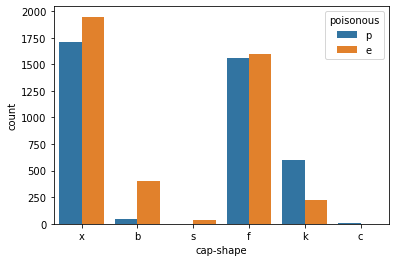

In [14]:
# countplot() 
import seaborn as sb

# 범주형 데이터에서 클래스의 갯수를 표현하는 경우에 주로 사용
# x : x축값, hue : 색상 (x축값마다의 막대그래프의 갯수)
sb.countplot(data=mushroom, x="cap-shape", hue=y)

# 데이터 전처리

- 인코딩 (encoding) : 범주형 데이터를 수치형 데이터로 변환하는 것
  - 계산하기 위해
  
  - 라벨(label) 인코딩 : 범주형을 정수로 변환
    - 크기특성이 없는 데이터에 크기를 갖는 숫자를 부여하는 문제 
  - one hot encoding : 범주형을 이진수로 변환
    - 크기특성이 없는 데이터에 크기가 없는 숫자를 부여할 수 있음
    - 특성을 늘려주는 효과가 있음
    
- one hot encoding 방법
  - 과목 : 국어, 수학, 과학 -> 과학(001), 국어(010), 수학(100) 
  - 각 비트에 해당하는 새로운 컬럼을 생성
  - 새로운 컬럼의 순서는 클래스 값을 오름차순 정렬을 한 후에 순서대로 생성
  - 해당 클래스인 경우에만 1이고 그렇지 않으면 0을 할당  
  
  - pandas에서 원핫인코딩을 위한 함수을 제공 : get_dummies()
    - 원핫인코딩에 해당하는 컬럼을 생성하고 기존 컬럼은 삭제
    
  - 원핫인코딩의 장점
    - 새로운 특성을 늘려주는 효과 - 과소적합 감소
    - 크기를 갖지않는 범주형 데이터를 크기를 갖지 않는 수치형으로 변환

In [1]:
import pandas as pd

data = pd.DataFrame({"산이름":["백두산", "한라산", "무등산"]})

data

,산이름
0,백두산
1,한라산
2,무등산


In [3]:
one_hot = pd.get_dummies(data["산이름"])

one_hot

,무등산,백두산,한라산
0,0,1,0
1,0,0,1
2,1,0,0


In [7]:
# mushroom 데이터를 원핫인코딩
X2 = X.copy()

one_hot_X = pd.get_dummies(X2)

one_hot_X.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [8]:
# 훈련데이터와 테스트데이터로 분리
from sklearn.model_selection import train_test_split

# test_size=0.3 : 테스트데이터 비율을 30%로 설정
X_train, X_test, y_train, y_test = train_test_split(one_hot_X, y,
                                                    random_state=999,
                                                    test_size=0.3)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5686, 117), (2438, 117), (5686,), (2438,))

# 모델 학습

In [10]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [11]:
print("훈련정확도 : ", model_dt.score(X_train, y_train))
print("테스트정확도 : ", model_dt.score(X_test, y_test))

훈련정확도 :  1.0
테스트정확도 :  1.0


## 트리 시각화하기

In [12]:
!pip install graphviz

- 윈도우용 graphviz 패키지 설치
  - https://www2.graphviz.org/Packages/development/windows/10/cmake/Release/x64/

In [19]:
# path 설정
import os

os.environ["PATH"] += os.pathsep + "C:/Program Files/Graphviz/bin"

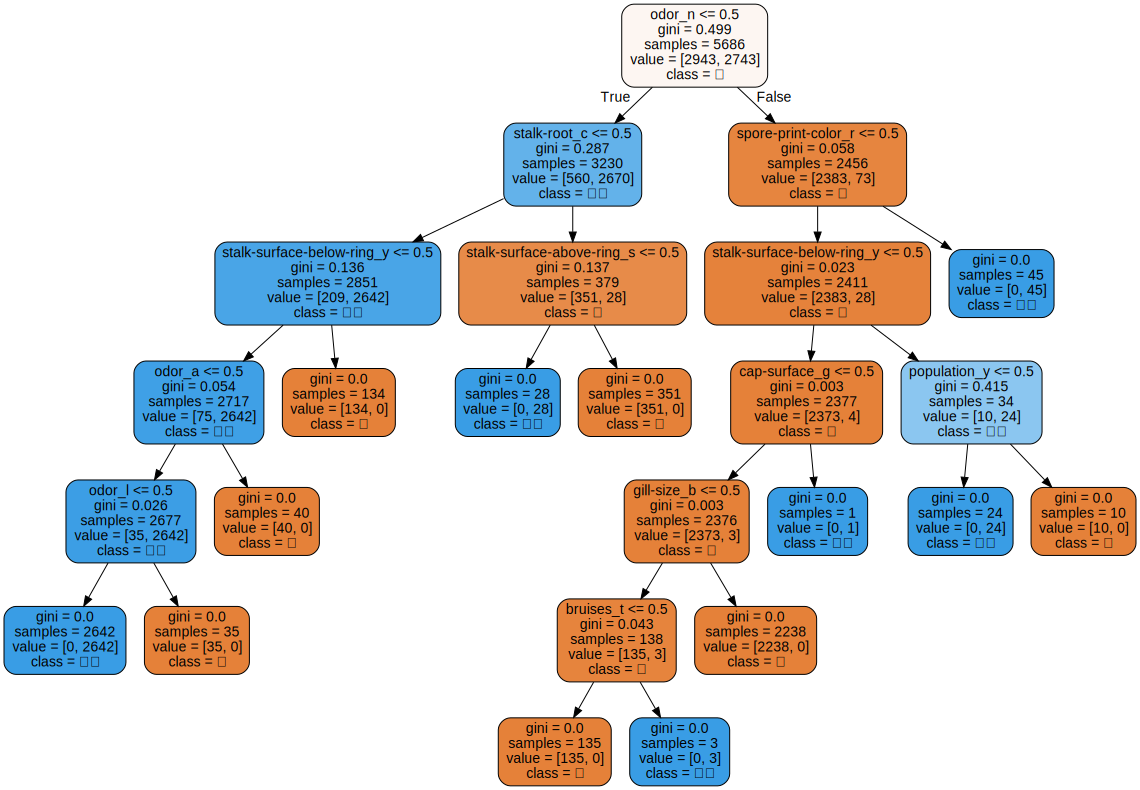

In [22]:
# 만든 트리정보를 저장
from sklearn.tree import export_graphviz
import graphviz

# 사용한 모델, 저장할 파일명, 클래스명, 특성이름(컬럼명)
# impurity(불순도 저장여부), filled (색칠여부), rounded (둥근사각형사용여부)
export_graphviz(model_dt, out_file="tree.dot",
                class_names=["독", "식용"],
                feature_names=one_hot_X.columns,
                impurity=True,
                filled=True,
                rounded=True)

# with : 파일을 열었으면 반드시 닫아주어야 하는데 이것을 자동 닫아줌
# open() : 파일을 읽거나 쓰기위해서 연다
# encoding="UTF8" : 한글 인코딩
with open("tree.dot", encoding="UTF8") as f :
    # 파일 읽기
    dot_graph = f.read()
    
# 그래프 출력
display(graphviz.Source(dot_graph))

## 사전 가지치기 (pre_pruning)

- 트리의 복잡도를 감소시켜서 과대적합을 줄여주는 방법
- 종류
  - max_depth : 트리의 층을 제한
  - max_leaf_nodes : leaf node의 수를 제한
  - min_samples_split : 노드를 분리하는 최소 데이터의 수를 설정

### max_depth를 이용한 사전가지치기

In [25]:
model_dt2 = DecisionTreeClassifier(max_depth=3)
model_dt2.fit(X_train, y_train)

print("훈련정확도 : ", model_dt2.score(X_train, y_train))
print("테스트정확도 : ", model_dt2.score(X_test, y_test))

훈련정확도 :  0.9843475202251143
테스트정확도 :  0.9872846595570139


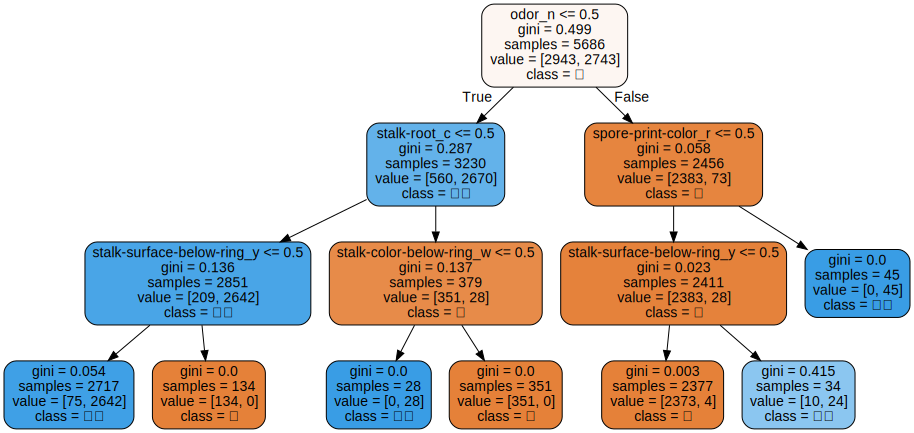

In [28]:
export_graphviz(model_dt2, out_file="tree2.dot",
                class_names=["독", "식용"],
                feature_names=one_hot_X.columns,
                impurity=True,
                filled=True,
                rounded=True)

with open("tree2.dot", encoding="UTF8") as f :
    dot_graph = f.read()
    
display(graphviz.Source(dot_graph))

### max_leaf_nodes를 이용한 가지치기

In [29]:
model_dt3 = DecisionTreeClassifier(max_leaf_nodes=5)
model_dt3.fit(X_train, y_train)

print("훈련정확도 : ", model_dt3.score(X_train, y_train))
print("테스트정확도 : ", model_dt3.score(X_test, y_test))

훈련정확도 :  0.9769609567358424
테스트정확도 :  0.9799015586546349


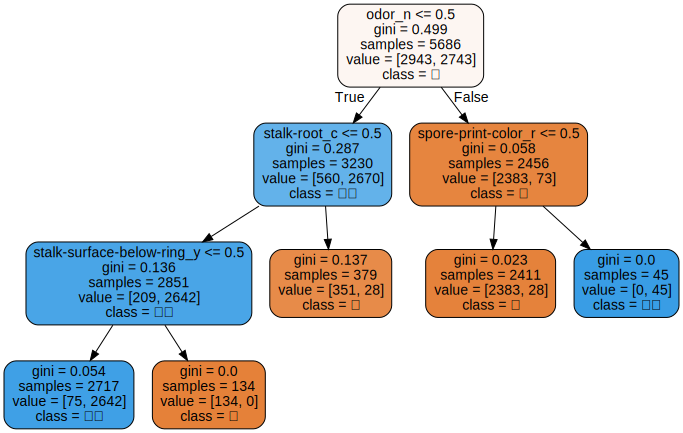

In [30]:
export_graphviz(model_dt3, out_file="tree3.dot",
                class_names=["독", "식용"],
                feature_names=one_hot_X.columns,
                impurity=True,
                filled=True,
                rounded=True)

with open("tree3.dot", encoding="UTF8") as f :
    dot_graph = f.read()
    
display(graphviz.Source(dot_graph))

### min_samples_split을 이용한 가지치기

In [31]:
model_dt4 = DecisionTreeClassifier(min_samples_split=3000)
model_dt4.fit(X_train, y_train)

print("훈련정확도 : ", model_dt4.score(X_train, y_train))
print("테스트정확도 : ", model_dt4.score(X_test, y_test))

훈련정확도 :  0.9454801266268027
테스트정확도 :  0.9450369155045119


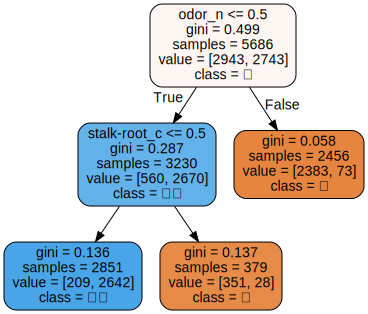

In [32]:
export_graphviz(model_dt4, out_file="tree4.dot",
                class_names=["독", "식용"],
                feature_names=one_hot_X.columns,
                impurity=True,
                filled=True,
                rounded=True)

with open("tree4.dot", encoding="UTF8") as f :
    dot_graph = f.read()
    
display(graphviz.Source(dot_graph))

## 교차검증 (cross validation)

- 훈련데이터와 테스트데이터 셋을 여러개 형태로 만들어 훈련시킨 후 정확도를 평균내는 방법

In [34]:
from sklearn.model_selection import cross_val_score
import numpy as np

# cv=5 : 데이터셋의 갯수
score = cross_val_score(model_dt, X_test, y_test, cv=5)
print("교차검증점수 : ", score)
print("최종점수 : ", np.mean(score))

교차검증점수 :  [1.         1.         0.99795082 1.         0.99383984]
최종점수 :  0.9983581310802169


## 정규화

- 편향된 데이터를 정규분포로 만드는 작업
- 모델의 성능을 향상

In [36]:
data = pd.read_csv("./data/data_skew.csv")

data.head()

,0,1,2,y
0,56,18,27,2.926144
1,81,57,3,4.744364
2,25,9,11,1.439488
3,20,13,30,0.569621
4,27,13,13,1.230924


In [37]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [47]:
X.iloc[:, 1].skew()

4.096528128036276

<BarContainer object of 249 artists>

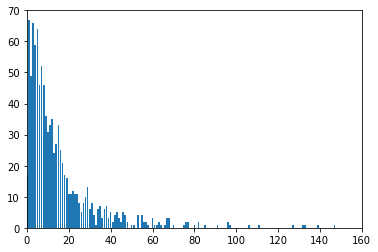

In [39]:
import matplotlib.pyplot as plt

plt.xlim(0, 160)
plt.ylim(0, 70)
# X 데이터의 1번 인덱스의 값들의 개수를 저장
bins = np.bincount(X.iloc[:, 1])
# x축 : 값들의 종류를 표시, y축 : 값 (개수)
plt.bar(range(len(bins)), bins)

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=555)

In [42]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

knn_model = KNeighborsRegressor(n_neighbors=3)
knn_model.fit(X_train, y_train)

pred_train = knn_model.predict(X_train)
pred_test = knn_model.predict(X_test)

print("훈련오차 : ", mean_squared_error(pred_train, y_train))
print("테스트오차 : ", mean_squared_error(pred_test, y_test))

훈련오차 :  0.3094569314428629
테스트오차 :  0.567002986324778


In [44]:
# 정규분포로 만들기
# 왼쪽을 편향되어 있으면 log()를 오른쪽으로 편향되어 있으면 exp()를 사용
# 1을 더하는 이유 : 0이되면 log가 무한대(inf)가 되기때문에 이를 방지하기 위한 것
X_train2 = np.log(X_train + 1)
X_test2 = np.log(X_test + 1)

In [48]:
X_train2.iloc[:, 0].skew()

-0.10017324773414837

(array([18.,  0.,  0., 28.,  0., 52.,  0., 32., 54., 81., 41., 52., 82.,
        34., 73., 58., 40., 31., 14., 23., 13., 11.,  6.,  4.,  3.]),
 array([0.        , 0.1979504 , 0.39590079, 0.59385119, 0.79180158,
        0.98975198, 1.18770237, 1.38565277, 1.58360316, 1.78155356,
        1.97950396, 2.17745435, 2.37540475, 2.57335514, 2.77130554,
        2.96925593, 3.16720633, 3.36515673, 3.56310712, 3.76105752,
        3.95900791, 4.15695831, 4.3549087 , 4.5528591 , 4.75080949,
        4.94875989]),
 <BarContainer object of 25 artists>)

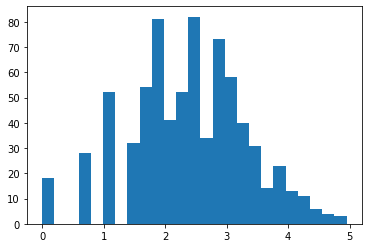

In [45]:
plt.hist(X_train2.iloc[:, 0], bins=25)

In [46]:
knn_model.fit(X_train2, y_train)

pred_train = knn_model.predict(X_train2)
pred_test = knn_model.predict(X_test2)

print("훈련오차 : ", mean_squared_error(pred_train, y_train))
print("테스트오차 : ", mean_squared_error(pred_test, y_test))

훈련오차 :  0.2229992835570005
테스트오차 :  0.42957401642689336
